In [1]:
import numpy as np
import pandas as pd

# Section 12: Data Visualization

**Data visualization** is the practice of producing graphical representations of data to convey a finding, summarize a concept, or get a quick understanding of the dataset we're working with.

In this section we'll cover:
* matplotlib
* plotting in Pandas, including:
  * bar chards
  * histograms
  * pie plots
  * scatter plots
  * jointplots
* an introduction to other dataviz libraries and concepts

We'll be answering various questions using different chart types, and we'll which graphs to use in which situations. Data visualization is critical to being able to communicate your data with colleagues and peers. Aspects of data visualization can also be incorporated into rich infographics. The possibilities are endless.

In this section we'll go from raw data to visual representations in a modest fashion. We'll start from the very basics and build up to more advanced graphs. Perhaps more important than the mechanics of building a graph is to understand when to use each type of graph to answer specific questions. It is important to use the correct chart in the right context to avoid producing misleading or nonsense graphs.

## The Preliminaries of matplotlib

**matplotlib** is a Python library that serves as the workhorse data visualization package that, among other things, powers the plotting methods in Pandas. Keep in mind, though, that matplotlib goes beyond Pandas and supports many backend applications. 

* https://matplotlib.org/stable/gallery/index.html

Let's start by generating from random data. We'll sample 400 random observations from the normal distribution.

In [2]:
np.random.normal(size = 400)

array([-2.15927005e-02,  5.34413113e-01,  1.48209333e+00, -1.48407574e-01,
        4.20686029e-01,  1.64814303e+00,  2.16617349e+00, -6.09798589e-01,
       -2.42780446e+00,  4.98240945e-01, -2.69167919e-01,  1.55872560e+00,
        1.34184536e+00, -5.15535005e-01, -5.20321449e-01,  1.82957978e-01,
       -6.90008826e-01, -1.33039552e+00, -1.07913455e-01,  2.80516488e+00,
        9.92423541e-01,  1.37860073e+00, -2.43544243e+00,  8.05086332e-01,
        6.95020104e-01, -1.47004641e+00,  7.75103151e-01, -8.06871804e-01,
        1.84507121e+00,  7.74091332e-01, -4.83585583e-01,  1.12531138e+00,
       -8.29745060e-01, -2.06428963e+00, -1.95506846e-01, -1.35393729e+00,
        6.08414549e-01,  9.34989821e-01, -1.30632868e+00, -4.32554674e-01,
        1.04162028e+00, -4.13234161e-01, -3.14818717e-01,  1.65461243e+00,
        2.09078481e+00,  3.38028429e-01,  5.97561226e-01,  4.21615692e-01,
        4.06644911e-01, -4.07575442e-01, -1.40872609e+00,  6.09592453e-01,
       -2.07512400e-01,  

In [3]:
x = np.random.normal(size = 400)

Let's now import matplotlib. We use the pyplot functions of matplotlib primarily, which are a collection of functions that make matplotlib work somewhat like MATLAB.
* https://matplotlib.org/stable/tutorials/introductory/pyplot.html

Referring to *pyplot* as `plt` is a convention in the community.

In [4]:
import matplotlib.pyplot as plt
# alternatively: from matplotlib import pyplot as plt

Let's plot our randomly sampled data. To do this we can use the simply method `plt.plot()`.

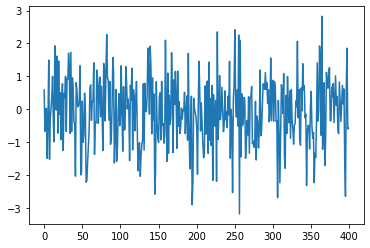

In [5]:
plt.plot(x)

Definitely not the most attractive plot, but it works. It produces a visualization of the data we passed in.

Instead of plotting each individual value, let's instead try plotting the cumulative sum such that we create the appearance of a series evolving through time.

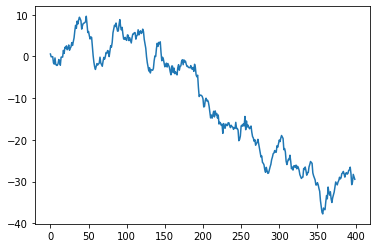

In [6]:
plt.plot(x.cumsum())

Notice that in addition to the plot itself, the code also outputs a Python list indicating its place in memory. The instructor doesn't find this particularly useful, and usually suppreses it by placing a semicolon at the end of the code line.

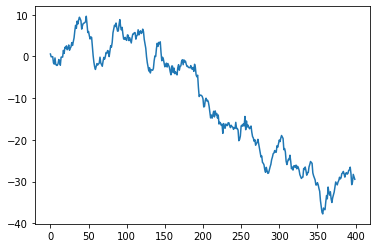

In [7]:
plt.plot(x.cumsum());

Now let's talk about styling. Matplotlib offers a rich interface to change many details of the plots. However, the instructor recommends starting with the built-in templates. 
Let's see what styles we have available.

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Let's pick one of them, say, `ggplot`.

In [9]:
plt.style.use('ggplot')

Now let's re-execute the plot

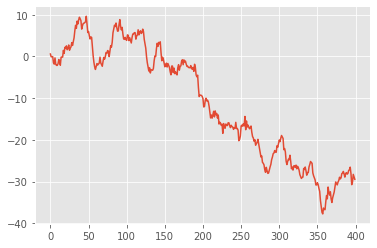

In [10]:
plt.plot(x.cumsum());

Looks nice! The instructor suggests trying others to see what you like.

What happens if we want to add more data to this plot? Let's start by generating another series of data.

In [11]:
y = np.random.normal(size = 400)

And then we plot it.

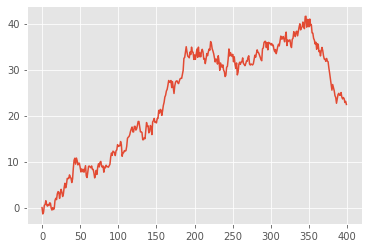

In [12]:
plt.plot(y.cumsum());

Okay so that worked, but we're getting our two series `x` and `y` on two separate plots. How do we get them onto the same figure? 

We can do this by placing them into the same code cell and executing that cell.

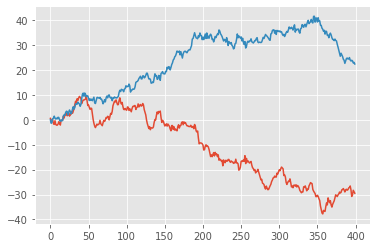

In [13]:
plt.plot(x.cumsum());
plt.plot(y.cumsum());

Cool! Notice how matplotlib has plotting both series on the same set of axes, and has automatically colored the two series differently. Colors can always be changed using the `color` parameter in the plot function.

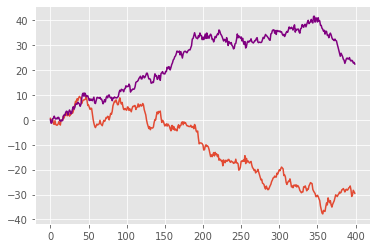

In [14]:
plt.plot(x.cumsum());
plt.plot(y.cumsum(), color = 'purple');

Our graph is pretty uninformative with **axis labels**. Let's add some!

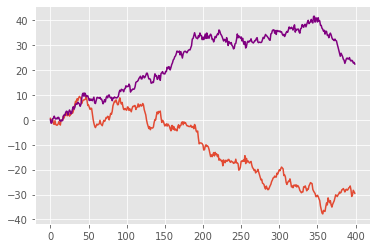

In [15]:
plt.plot(x.cumsum(), label = 'x');
plt.plot(y.cumsum(), color = 'purple', label = 'y');

So that didn't really do much. We still can't tell which series is which. To fix this, we can add a useful **legend**. This should be called within the same code cell/block as the plotting calls.

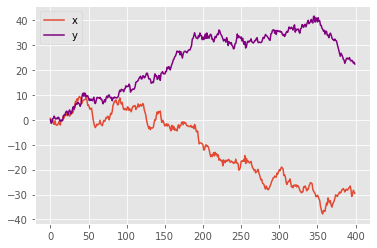

In [16]:
plt.plot(x.cumsum(), label = 'x');
plt.plot(y.cumsum(), color = 'purple', label = 'y');
plt.legend();

We've so far been using the word "plot" very loosely to refer to our graph that we see. However, the more technically correct term to use is **figure**, which is the *overall container that holds our plot*. 

The **figure** actually acts as a *grid* that holds or contains one or more individual graphs as *axes*. The axes within a figure refer to the space where the graph is plotted.

To demonstrate, let's get a hold of the figure and axes separately.


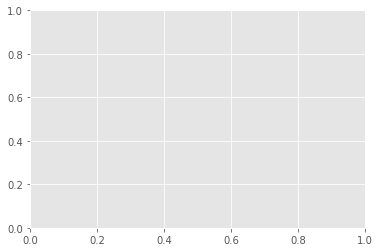

In [17]:
figure, axes = plt.subplots()

We now have a figure and a set of axes, with the figure showing. We can now replot our data as we did before, but this time we'll call it on the axes. Remember, the figure is just a container and the axes is where the plotting actually takes place.

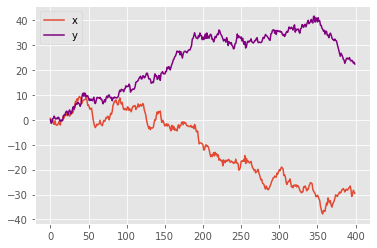

In [18]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

Very nice. What else can we do? Perhaps we can squish the graph down a bit so that the plot is shorter and wider. For this, we need to change the size of the figure canvas. We do this by calling the `set_size_inches()` method on the `figure` object.
* https://www.geeksforgeeks.org/matplotlib-figure-figure-set_size_inches-in-python/



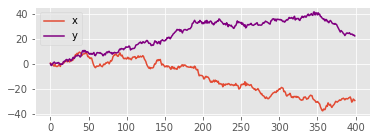

In [19]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

figure.set_size_inches(6, 2)

Sure enough we now have a longer graph. Let's make it even longer!

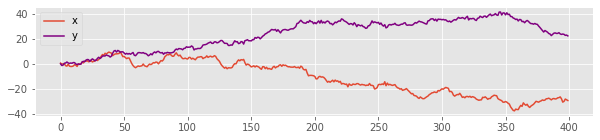

In [20]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

figure.set_size_inches(10, 2)

The `plot()` method is actually an `axes` method. For convenience and quick access, it is also available on the pyplot object `plt`, which we saw above.

You can also have multiple plots (axes) within one figure. This involves passing in arguments for numbers of rows and columns into the `plt.subplots()` function. This tutorial outlines how.
* https://www.statology.org/matplotlib-multiple-plots/

## Line Graphs in Matplotlib

We shift our attention now to data visualization using Pandas, which relies on matplotlib under the hood. 

We'll start with **line graphs**, which are principally used for observing the change in a variable over a period of time. 

To visualize, we'll return to the brent crude prices.

In [21]:
import pandas as pd

In [22]:
brent = pd.read_csv('https://andybek.com/pandas-oil')

In [23]:
brent.head(3)

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55


As we recall, the data was fairly basic - it provided a sequence of prices and dates corresponding to those prices. In order to plot this in Pandas, we can call the `plot()` method on the data itself. We don't actually need to import pyplot or do any thing of that.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

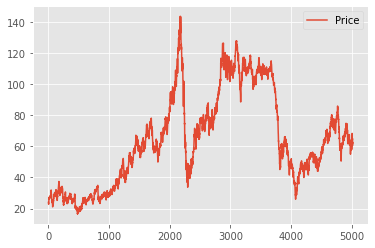

In [24]:
brent.plot();

Beautiful. That beauty of this "wrapper" that Pandas uses here is to give us a quick, easy way to build plots while also allowing for customization by directly accessing and setting matplotlib kwargs.

For instance, we can change the color as follows:

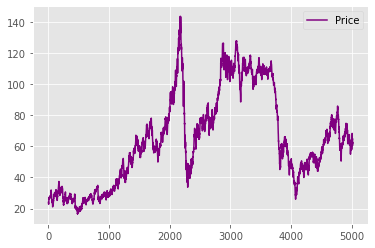

In [25]:
brent.plot(color = "purple");

Let's also bring back our tech giants dataframe, which consisted of stock prices for five of the biggest tech companies.

In [26]:
tech = pd.read_csv('https://andybek.com/pandas-tech')

In [27]:
tech.head()

,date,month,year,day,name,open,close,high,low,volume,volume_type
0,2014-01-02,1,2014,2,FB,54.86,54.71,55.22,54.19,43257622,medium
1,2014-01-02,1,2014,2,AAPL,79.38,79.02,79.58,78.86,8398851,low
2,2014-01-02,1,2014,2,GOOGL,557.73,556.56,558.88,554.13,1822719,medium
3,2014-01-02,1,2014,2,MSFT,37.35,37.16,37.40,37.10,30643745,medium
4,2014-01-02,1,2014,2,AMZN,398.80,397.97,399.36,394.02,2140246,medium


To plot this data, we'll re-import this data and parse the "date" column as datetimes and also set that column as the index. This will make plotting much easier, especially with automatic date formatting.

In [28]:
tech = pd.read_csv('https://andybek.com/pandas-tech', index_col = 0, parse_dates = True)

In [29]:
tech.head()

,month,year,day,name,open,close,high,low,volume,volume_type
date,,,,,,,,,,
2014-01-02,1,2014,2,FB,54.86,54.71,55.22,54.19,43257622,medium
2014-01-02,1,2014,2,AAPL,79.38,79.02,79.58,78.86,8398851,low
2014-01-02,1,2014,2,GOOGL,557.73,556.56,558.88,554.13,1822719,medium
2014-01-02,1,2014,2,MSFT,37.35,37.16,37.40,37.10,30643745,medium
2014-01-02,1,2014,2,AMZN,398.80,397.97,399.36,394.02,2140246,medium


In [30]:
tech.index

DatetimeIndex(['2014-01-02', '2014-01-02', '2014-01-02', '2014-01-02',
               '2014-01-02', '2014-01-03', '2014-01-03', '2014-01-03',
               '2014-01-03', '2014-01-03',
               ...
               '2019-08-22', '2019-08-22', '2019-08-22', '2019-08-22',
               '2019-08-22', '2019-08-23', '2019-08-23', '2019-08-23',
               '2019-08-23', '2019-08-23'],
              dtype='datetime64[ns]', name='date', length=7105, freq=None)

Nice! Notice the somewhat odd structure of the dataset. We've got all five tickers for each date, in that repeating pattern for over 4 years. In other words, we have multiple rows that use the same index. This is not very conductive to default plotting behavior.

For that reason, we'll need to reshape the data a bit. Suppose we want to plot the closing prices and dates. To do this, we'll create several new series containing only the data of interest (closing prices) for the companies we want to evaluate. Let's start with creating a series containing the closing prices for Facebook ("FB"). Our approach will be to use the `loc[]` indexer to select only rows corresponding to Facebook, and only take the "close" column. Additionally, we'll rename this series as "Facebook".

In [31]:
fb = tech.loc[tech.name == 'FB', 'close'].rename("Facebook")

In [32]:
fb

date
2014-01-02     54.71
2014-01-03     54.56
2014-01-06     57.20
2014-01-07     57.92
2014-01-08     58.23
               ...  
2019-08-19    186.17
2019-08-20    183.81
2019-08-21    183.55
2019-08-22    182.04
2019-08-23    177.75
Name: Facebook, Length: 1421, dtype: float64

Let's do the same for Microsoft and Apple.

In [33]:
msft = tech.loc[tech.name == 'MSFT', 'close'].rename("Microsoft")
aapl = tech.loc[tech.name == 'AAPL', 'close'].rename("Apple")

We can now use the `plot()` method to plot any of these series.

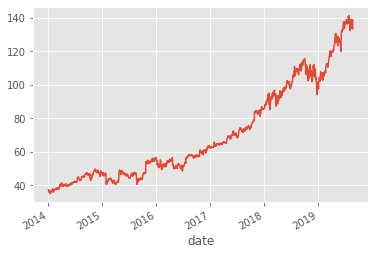

In [34]:
msft.plot()

The question is, how do we plot all three of these on the same graph within Pandas? Fortunately, when we call `plot()` on a dataframe, Pandas automatically plots all columns as separate line graphs. So all we need to do is create a dataframe that contains the three series we want.

We can do this using the Pandas `.concat()` method!

In [35]:
dfs = pd.concat([fb, msft, aapl], axis = 1)

In [36]:
dfs.head()

,Facebook,Microsoft,Apple
date,,,
2014-01-02,54.71,37.16,79.02
2014-01-03,54.56,36.91,77.28
2014-01-06,57.20,36.13,77.70
2014-01-07,57.92,36.41,77.15
2014-01-08,58.23,35.76,77.64


Now we can plot those suckers.

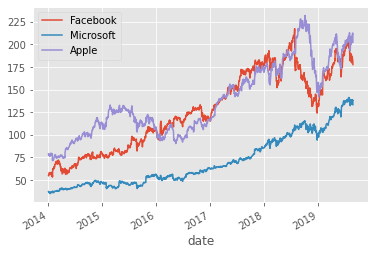

In [37]:
dfs.plot();

Awesome, and we didn't even need to import matplotlib to accomplish this. 

By the way, if we want to break these up into separate subplots within the same figure, all we need to do is set the `subplots` parameter to `True`, which creates a separate subplot for each column of data.

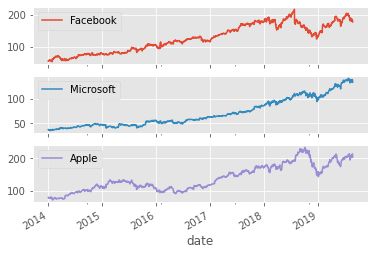

In [38]:
dfs.plot(subplots = True);

Let's make these fat lines a bit skinner with hte `linewidth` parameter.

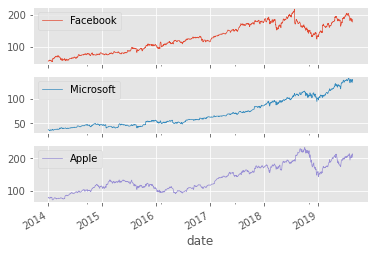

In [39]:
dfs.plot(subplots = True, linewidth = 0.7);

And to reshape the whole figure, we can use the `figsize` parameter.

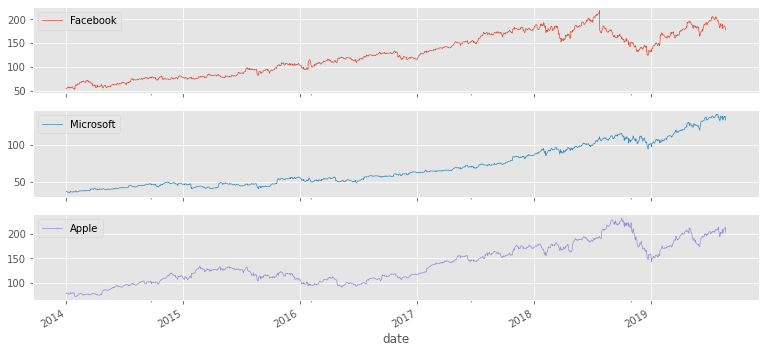

In [40]:
dfs.plot(subplots = True, linewidth = 0.7, figsize = (13, 6));

Essentially what's going on here is Pandas is exposing the matplotlib API for us. When we pass in the parameters, we're actually controlling matplotlib behind the scenes. But the Pandas inferface is just much simpler; the manual constructs from matplotlib have been abstracted away, leaving us with this nice interface.

## Bar Charts

**Bar charts** are used (and overused) for displaying numerical values across different categorical values (for example, number of marathon runners by age).

In fact, let's work with that second example. We'll start by importing or data again.

In [41]:
boston = pd.read_csv('https://andybek.com/pandas-marathon')

In [42]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


We'll use age as our *categorical* variable, and within each age we'll count the number of runners.

Let's start by isolating "age".

In [43]:
boston.Age

0      24
1      30
2      25
3      32
4      31
       ..
995    38
996    43
997    40
998    35
999    35
Name: Age, Length: 1000, dtype: int64

This returns a sequence of integers. There's not too much we can do with this. A standard `plot()` will look like nonsense.

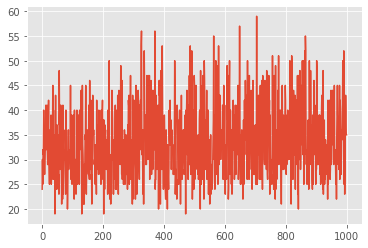

In [44]:
boston.Age.plot()

So, we need to go from a sequence of integers representing the ages, to a combination of categories and numerical values. In this particular case, we can do this using the `value_counts()` method.

In [45]:
boston.Age.value_counts()

28    60
30    60
26    56
29    56
32    53
36    50
27    49
33    49
35    48
31    44
25    41
34    37
39    35
37    33
40    33
24    29
38    29
41    29
23    23
42    22
43    21
44    18
45    17
47    15
22    15
46    12
50    12
21    12
48     9
49     6
52     5
20     5
19     4
53     4
51     3
55     2
56     2
57     1
59     1
Name: Age, dtype: int64

This is terrific. This has returned a Series containing all of the unique values in "Age", and the number of times those values appear. So the index is the value of Age, and the value is the number of times each Age appears in the dataset. We're ready to plot, ladies and gents. And to do this, we will use the `kind` parameter and set it to `bar`.
* Alternatively, we can use the `plot.bar()` method.

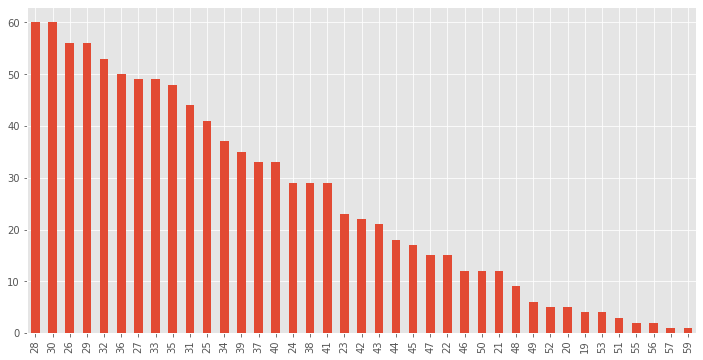

In [46]:
boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6));

This plot gives us the Age on the x-axis and the count of that age on the y-axis. Let's label these for clarity. How do we do that? We first have to get a handle on the *AxesSubplot* that is being returned by this method call. We can observe it explicitly by removing the suppressive semicolon.

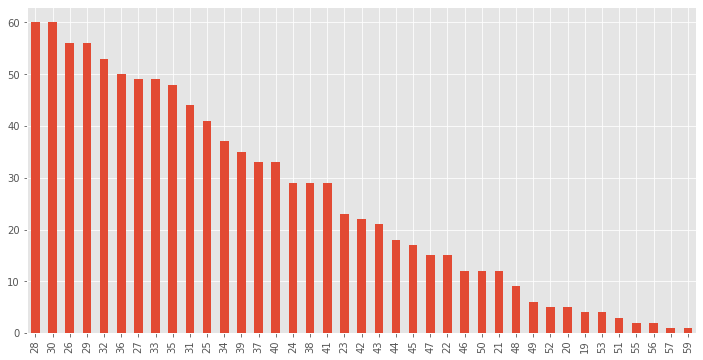

In [47]:
boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6))

This isn't terribly helpful though. What we need to do is actually create a variable for this axis object, which will then allow us to use the labeling methods.

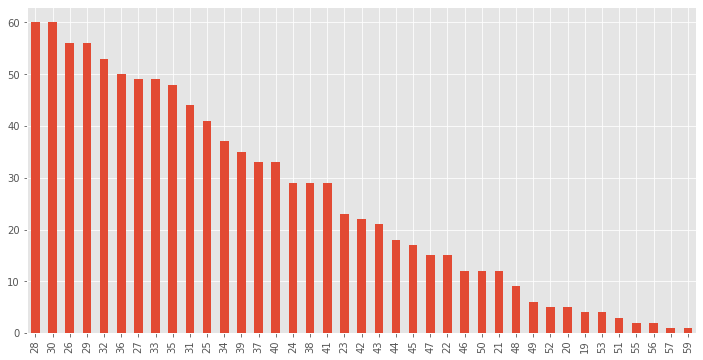

In [48]:
ax = boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6));

Now we can call the label methods on the axis object.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

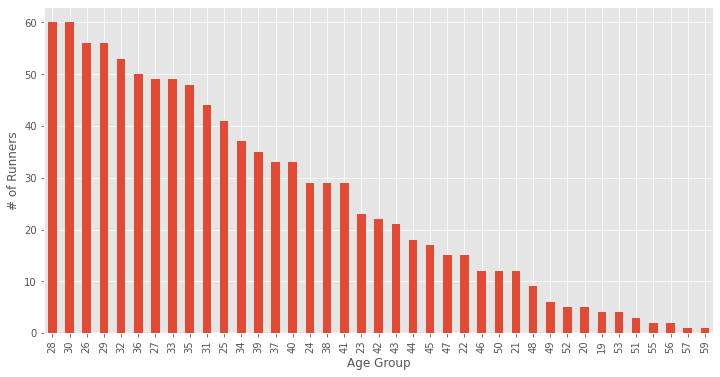

In [49]:
ax = boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6));
ax.set_xlabel('Age Group');
ax.set_ylabel('# of Runners');

Much better. But notice something confusing - the Age categories are not incremental. Instead they are somewhat random. This is because `value_counts()` automatically sorts the output in decreasing order, as is abundantly clear from the graph. So perhaps one thing we should do is sort the Age labels. All we have to do is set the `sort` parameter within `value_counts()` to `False`!

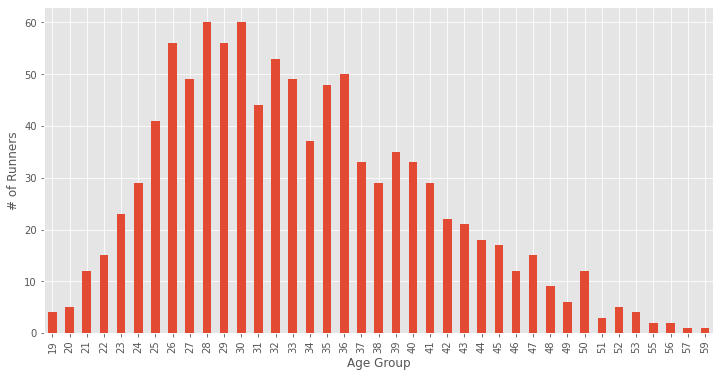

In [50]:
ax = boston.Age.value_counts(sort = False).plot(kind = 'bar', figsize = (12, 6));
ax.set_xlabel('Age Group');
ax.set_ylabel('# of Runners');

Lastly, we might be interested in producting *horizonal* barcharts. This is easily done by setting the `kind` parameter to `barh`.

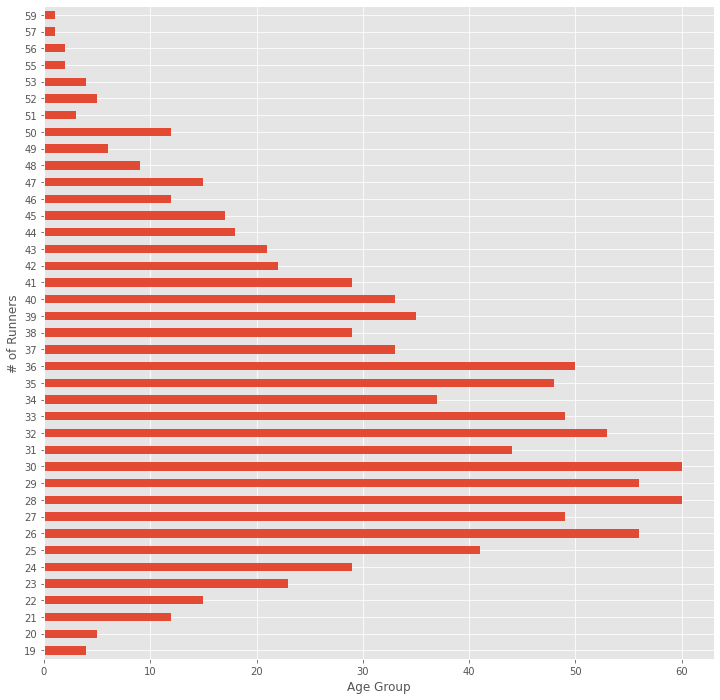

In [55]:
ax = boston.Age.value_counts(sort = False).plot(kind = 'barh', figsize = (12, 12));
ax.set_xlabel('Age Group');
ax.set_ylabel('# of Runners');

As a last little exercise, let's plot marathon runners by gender.

In [56]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


When plotting this data, we can actually create the x- and y-axis labels inline using the `xlabel` and `ylabel` parameters.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

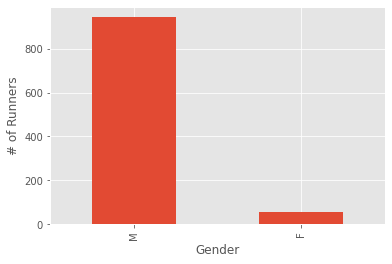

In [60]:
boston['M/F'].value_counts().plot(kind = 'bar', xlabel = 'Gender', ylabel = '# of Runners');

Raw counts are not the best output in some cases. We can convert this to percentages using the `normalize` parameter.

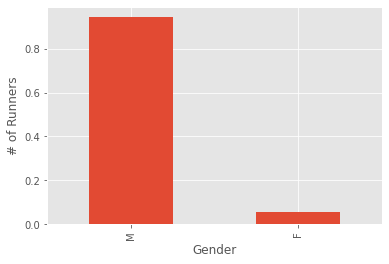

In [61]:
boston['M/F'].value_counts(normalize = True).plot(kind = 'bar', xlabel = 'Gender', ylabel = '# of Runners');